In [2]:
import sklearn
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/features.csv')

In [4]:
df = df.set_index(keys='id')

#### Checking Simularities:

## The recommender

Step one is getting our item ratings

In [5]:
df = pd.read_csv('../data/features.csv')

In [6]:
df.head()

,sharpness,saturation,brightness,entropy,contrast,colorfulness,id
0,45.042899,60.625145,3.839637,965.051933,76.142303,62.953686,63
1,65.857150,72.958046,4.571306,211.078292,58.294239,97.960309,1353
2,44.831194,58.877440,4.714785,745.972724,66.019640,52.555248,1421
3,42.557714,67.311302,4.013180,117.061072,57.933238,54.319254,2896
4,47.668126,60.862984,4.908555,700.064150,64.062041,60.220316,610


In [7]:
df.values

array([[4.50428988e+01, 6.06251447e+01, 3.83963689e+00, ...,
        7.61423030e+01, 6.29536859e+01, 6.30000000e+01],
       [6.58571503e+01, 7.29580458e+01, 4.57130625e+00, ...,
        5.82942395e+01, 9.79603090e+01, 1.35300000e+03],
       [4.48311941e+01, 5.88774400e+01, 4.71478489e+00, ...,
        6.60196399e+01, 5.25552477e+01, 1.42100000e+03],
       ...,
       [3.43348204e+01, 6.73800924e+01, 3.76923333e+00, ...,
        6.40775985e+01, 4.85085215e+01, 1.40400000e+03],
       [3.34368016e+01, 7.21566353e+01, 4.83479604e+00, ...,
        6.90054758e+01, 6.24076895e+01, 1.41000000e+03],
       [6.54952682e+01, 5.20034892e+01, 3.82627903e+00, ...,
        5.98515293e+01, 5.60837086e+01, 4.56800000e+03]])

In [8]:
# Cosine function
def cosine_similarity(a,b):
    return np.dot(a,b) / ( (np.dot(a,a) **.5) * (np.dot(b,b) ** .5) )

/var/folders/_b/xsxs0vzs0dg6t2wd_jx_dqx00000gn/T/ipykernel_72185/3920523969.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


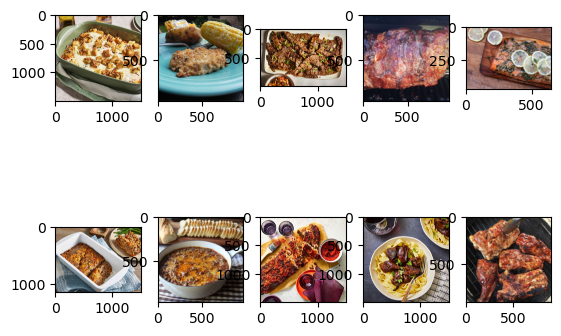

In [9]:
def findsimular(id:int, values = None):
    # get features for item:
    a = df[df.id==id].values
    try:
        if not values: values = df.values
    except Exception as e:
        pass
    
    l = []
    for key, value in enumerate(values):
        l.append([int(value[-1]),cosine_similarity(a[0][:-1],value[:-1])])
    return pd.DataFrame(l, columns =['id', 'simularity'])

val = findsimular(8768)

ids = val.sort_values(by='simularity', ascending=False)[:10]
import matplotlib.pyplot as plt
from PIL import Image

fig,ax = plt.subplots(2,5)

filenames=['../data/images/{}.jpg'.format(i) for i in ids['id']] #or glob or any other way to describe filenames
for i in range(10):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i%2][i//2].imshow(image)
fig.show()

In [10]:
for l in ids['id']:
    print(l)

8768
4995
211
160
4722
1020
5471
323
4236
3047


/var/folders/_b/xsxs0vzs0dg6t2wd_jx_dqx00000gn/T/ipykernel_72185/3018606617.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


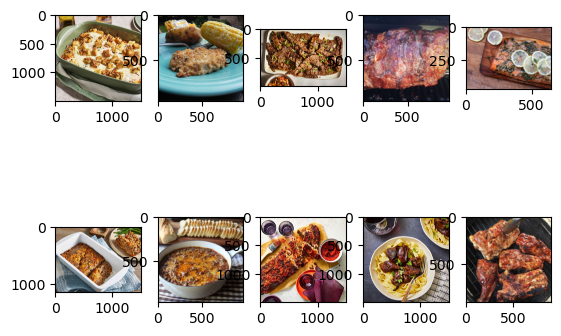

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

fig,ax = plt.subplots(2,5)

filenames=['../data/images/{}.jpg'.format(i) for i in ids['id']] #or glob or any other way to describe filenames
for i in range(10):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i%2][i//2].imshow(image)
fig.show()

In [12]:
print(val.simularity.min())
print(val.simularity.max())
print(val.simularity.mean())

0.1131061341960197
1.0
0.7863977957034681


In [13]:
from CF_recommender import CF_recommender
recommendation = CF_recommender


In [14]:
l = recommendation.recommend(80477, top_recipes=30)
l = l.reset_index(drop=True)
print(l.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  recipe &  predicted\_rating \\
\midrule
0  &    3564 &          6.016814 \\
1  &    1684 &          6.016814 \\
2  &    1377 &          6.016814 \\
3  &     384 &          6.016814 \\
4  &    1080 &          6.016814 \\
5  &    1690 &          6.016814 \\
6  &    2355 &          6.016814 \\
7  &    5041 &          5.832199 \\
8  &    3400 &          5.832199 \\
9  &      94 &          5.832199 \\
10 &     953 &          5.832199 \\
11 &    5003 &          5.832199 \\
12 &     205 &          5.832199 \\
13 &     686 &          5.832199 \\
14 &    1674 &          5.832199 \\
15 &    1888 &          5.832199 \\
16 &     222 &          5.792345 \\
17 &      31 &          5.716814 \\
18 &    2492 &          5.716814 \\
19 &      22 &          5.716814 \\
20 &     965 &          5.669195 \\
21 &     813 &          5.669195 \\
22 &     246 &          5.635733 \\
23 &     472 &          5.635733 \\
24 &    1513 &          5.635733 \\
25 &    3061 &          

/var/folders/_b/xsxs0vzs0dg6t2wd_jx_dqx00000gn/T/ipykernel_72185/346739130.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(l.to_latex())


In [15]:
df.head()

,sharpness,saturation,brightness,entropy,contrast,colorfulness,id
0,45.042899,60.625145,3.839637,965.051933,76.142303,62.953686,63
1,65.857150,72.958046,4.571306,211.078292,58.294239,97.960309,1353
2,44.831194,58.877440,4.714785,745.972724,66.019640,52.555248,1421
3,42.557714,67.311302,4.013180,117.061072,57.933238,54.319254,2896
4,47.668126,60.862984,4.908555,700.064150,64.062041,60.220316,610


In [16]:
def new_rank(margin, sim, star):
    star_rating = {'1':-2, '2':-1, '3':0, '4':1, '5':2}
    simweight = margin - ((1-sim)*100)
    # print(f'{star}, {star_rating[star]}, {margin},ss {(1-sim)*100}, {sim}, {simweight}')
    return star_rating[star] * (simweight * 0.5)

def findsimular(id:int, values = None, submission = None):
    # get features for item:
    a = df[df.id==id].values
    try:
        if not values: values = df.values
    except Exception as e:
        pass
    if a.any():
        l = []
        for key, value in enumerate(values):
            l.append([id, int(value[-1]), cosine_similarity(a[0][:-1],value[:-1]), submission[str(int(value[-1]))]])
        DF = pd.DataFrame(l, columns =['parent_id','sim_id', 'simularity','rated'])

        DF = DF[DF.simularity >= 0.8]
        
        final = []
        for simulated in DF.itertuples():
            final.append(new_rank(margin=20, sim=simulated.simularity, star=simulated.rated))

         
        return (sum(final)/len(final))

def getvalues(submission):
    id_list = submission.keys()
    id_list = [int(i) for i in id_list]
    values = df[df['id'].isin(id_list)].values
    return values


submission = {"1854": "5", "1880": "4", "1924": "5", "2002": "2", "2055": "1","7011": "5", "6002": "4", "5967": "5", "5003": "4", "50": "1"}
final = []
values = getvalues(submission)
new_values = []
for rec in l.itertuples():
    new_values.append([rec.recipe, rec.predicted_rating, rec.Index, findsimular(rec.recipe, values=values, submission=submission),])

for key, value in enumerate(new_values):
    if value[-1]:
        new_values[key].append((value[2]+1)-value[-1])
    # print(findsimular(rec.recipe, values=values, submission=submission))
final_df = pd.DataFrame(new_values, columns=['recipe_id', 'predicted_rating','index','simularity_adjustment','new_index'])
final_df.sort_values(by='new_index')


,recipe_id,predicted_rating,index,simularity_adjustment,new_index
0,3564,6.016814,0,8.927618,-7.927618
1,1684,6.016814,1,8.259713,-6.259713
2,1377,6.016814,2,7.027468,-4.027468
3,384,6.016814,3,7.949100,-3.949100
5,1690,6.016814,5,9.587242,-3.587242
6,2355,6.016814,6,9.290713,-2.290713
4,1080,6.016814,4,4.129139,0.870861
7,5041,5.832199,7,6.345779,1.654221
10,953,5.832199,10,6.534092,4.465908
12,205,5.832199,12,8.516729,4.483271
